In [21]:
import os
# os.chdir("1_feature_engineering")
exec(open("extract_review_features.py").read())

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [22]:
feature_matrix = produce_feature_matrix(data2)

Preprocessing Stem & Join (P): 5.723384141921997
Preprocessing No Stem (P): 4.876894474029541
Preprocessing No Stem & Punct (P): 4.649285316467285
TFIDF: 0.18485355377197266
Topics: 0.9260208606719971


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Metadata: 1.0110130310058594


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:354: RuntimeWarning: invalid value encountered in double_scalars


Syntax: 55.32958650588989
Embeddings: 151.53225827217102


In [23]:
feature_matrix.shape

(1050, 459)

#### Split out features by categories

In [24]:
feature_names = feature_matrix.columns[1:]

In [25]:
metadata_columns = feature_names[:5]

In [26]:
syntax_columns = feature_names[5:149]

In [27]:
embeddings_columns = feature_names[149:158]

In [28]:
tfidf_unigrams_columns = feature_names[158:258]

In [29]:
tfidf_bigrams_columns = feature_names[258:358]

In [30]:
topics_columns = feature_names[358:458]

#### Get the validation data

In [31]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [32]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=3,
                             min_samples_leaf=10,
                             max_features=0.6,
                             random_state=10191994,
                             class_weight="balanced",
                             n_jobs=-1)

In [61]:
X_train_ambiance = pickle.load(open("../../0_data/5_train_validation_test/X_train_ambiance_1050.pickle", "rb"))
y_train_ambiance = pickle.load(open("../../0_data/5_train_validation_test/y_train_ambiance_1050.pickle", "rb"))
X_validation_ambiance = pickle.load(open("../../0_data/5_train_validation_test/X_validation_ambiance_1050.pickle", "rb"))
y_validation_ambiance = pickle.load(open("../../0_data/5_train_validation_test/y_validation_ambiance_1050.pickle", "rb"))
X_test_ambiance = pickle.load(open("../../0_data/5_train_validation_test/X_test_ambiance_1050.pickle", "rb"))
y_test_ambiance = pickle.load(open("../../0_data/5_train_validation_test/y_test_ambiance_1050.pickle", "rb"))

In [77]:
def test_model(model, cat_list, train_x, train_y, test_x, test_y):
    train_x_df = pd.DataFrame(train_x)
    train_x_df.columns = ["text"] + list(feature_names)
    test_x_df = pd.DataFrame(test_x)
    test_x_df.columns = ["text"] + list(feature_names)
    
    tmp_train_df = pd.concat([train_x_df[x] for x in cat_list], axis=1)
#     print(tmp_train_df.columns)
    tmp_test_df = pd.concat([test_x_df[x] for x in cat_list], axis=1)
    
    return model.fit(tmp_train_df, train_y).score(
        tmp_test_df, test_y)

In [57]:
data.describe()

,food,service,price,ambiance
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.908571,0.637143,0.263810,0.404762
std,0.288355,0.481053,0.440907,0.491080
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [78]:
ambiance_syntax = test_model(clf, [syntax_columns], X_train_ambiance, y_train_ambiance, X_test_ambiance, y_test_ambiance)
ambiance_metadata = test_model(clf, [metadata_columns, syntax_columns], X_train_ambiance, y_train_ambiance, X_test_ambiance, y_test_ambiance)
ambiance_tfidf = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns], X_train_ambiance, y_train_ambiance, X_test_ambiance, y_test_ambiance)
ambiance_topics = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns], X_train_ambiance, y_train_ambiance, X_test_ambiance, y_test_ambiance)
ambiance_embeddings = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns, embeddings_columns], X_train_ambiance, y_train_ambiance, X_test_ambiance, y_test_ambiance)
ambiance_p = pickle.load(open("../../4_models/rf_ambiance_4iterations_athreshold_5000_200_1050.pickle", "rb"))
ambiance_pseudolabel = ambiance_p.score(X_test_ambiance[:, 1:], y_test_ambiance)

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1

In [83]:
ambiance = [ambiance_syntax, ambiance_metadata, ambiance_tfidf, ambiance_topics, ambiance_embeddings, ambiance_pseudolabel]

In [84]:
ambiance

[0.5857142857142857,
 0.5857142857142857,
 0.6238095238095238,
 0.7095238095238096,
 0.780952380952381,
 0.7904761904761904]

In [85]:
X_train_service = pickle.load(open("../../0_data/5_train_validation_test/X_train_service_1050.pickle", "rb"))
y_train_service = pickle.load(open("../../0_data/5_train_validation_test/y_train_service_1050.pickle", "rb"))
X_validation_service = pickle.load(open("../../0_data/5_train_validation_test/X_validation_service_1050.pickle", "rb"))
y_validation_service = pickle.load(open("../../0_data/5_train_validation_test/y_validation_service_1050.pickle", "rb"))
X_test_service = pickle.load(open("../../0_data/5_train_validation_test/X_test_service_1050.pickle", "rb"))
y_test_service = pickle.load(open("../../0_data/5_train_validation_test/y_test_service_1050.pickle", "rb"))

service_syntax = test_model(clf, [syntax_columns], X_train_service, y_train_service, X_test_service, y_test_service)
service_metadata = test_model(clf, [metadata_columns, syntax_columns], X_train_service, y_train_service, X_test_service, y_test_service)
service_tfidf = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns], X_train_service, y_train_service, X_test_service, y_test_service)
service_topics = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns], X_train_service, y_train_service, X_test_service, y_test_service)
service_embeddings = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns, embeddings_columns], X_train_service, y_train_service, X_test_service, y_test_service)
service_p = pickle.load(open("../../4_models/rf_service_4iterations_athreshold_5000_200_1050.pickle", "rb"))
service_pseudolabel = service_p.score(X_test_service[:, 1:], y_test_service)

service = [service_syntax, service_metadata, service_tfidf, service_topics, service_embeddings, service_pseudolabel]

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1

In [86]:
service

[0.5285714285714286,
 0.6095238095238096,
 0.8142857142857143,
 0.819047619047619,
 0.861904761904762,
 0.861904761904762]

In [87]:
X_train_price = pickle.load(open("../../0_data/5_train_validation_test/X_train_price_1050.pickle", "rb"))
y_train_price = pickle.load(open("../../0_data/5_train_validation_test/y_train_price_1050.pickle", "rb"))
X_validation_price = pickle.load(open("../../0_data/5_train_validation_test/X_validation_price_1050.pickle", "rb"))
y_validation_price = pickle.load(open("../../0_data/5_train_validation_test/y_validation_price_1050.pickle", "rb"))
X_test_price = pickle.load(open("../../0_data/5_train_validation_test/X_test_price_1050.pickle", "rb"))
y_test_price = pickle.load(open("../../0_data/5_train_validation_test/y_test_price_1050.pickle", "rb"))

price_syntax = test_model(clf, [syntax_columns], X_train_price, y_train_price, X_test_price, y_test_price)
price_metadata = test_model(clf, [metadata_columns, syntax_columns], X_train_price, y_train_price, X_test_price, y_test_price)
price_tfidf = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns], X_train_price, y_train_price, X_test_price, y_test_price)
price_topics = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns], X_train_price, y_train_price, X_test_price, y_test_price)
price_embeddings = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns, embeddings_columns], X_train_price, y_train_price, X_test_price, y_test_price)
price_p = pickle.load(open("../../4_models/rf_price_4iterations_athreshold_5000_200_1050.pickle", "rb"))
price_pseudolabel = price_p.score(X_test_price[:, 1:], y_test_price)

price = [price_syntax, price_metadata, price_tfidf, price_topics, price_embeddings, price_pseudolabel]

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1

In [88]:
price

[0.6571428571428571,
 0.7380952380952381,
 0.8142857142857143,
 0.8142857142857143,
 0.8333333333333334,
 0.8428571428571429]

In [89]:
X_train_food = pickle.load(open("../../0_data/5_train_validation_test/X_train_food_1050.pickle", "rb"))
y_train_food = pickle.load(open("../../0_data/5_train_validation_test/y_train_food_1050.pickle", "rb"))
X_validation_food = pickle.load(open("../../0_data/5_train_validation_test/X_validation_food_1050.pickle", "rb"))
y_validation_food = pickle.load(open("../../0_data/5_train_validation_test/y_validation_food_1050.pickle", "rb"))
X_test_food = pickle.load(open("../../0_data/5_train_validation_test/X_test_food_1050.pickle", "rb"))
y_test_food = pickle.load(open("../../0_data/5_train_validation_test/y_test_food_1050.pickle", "rb"))

food_syntax = test_model(clf, [syntax_columns], X_train_food, y_train_food, X_test_food, y_test_food)
food_metadata = test_model(clf, [metadata_columns, syntax_columns], X_train_food, y_train_food, X_test_food, y_test_food)
food_tfidf = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns], X_train_food, y_train_food, X_test_food, y_test_food)
food_topics = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns], X_train_food, y_train_food, X_test_food, y_test_food)
food_embeddings = test_model(clf, [metadata_columns, syntax_columns, tfidf_unigrams_columns, tfidf_bigrams_columns, topics_columns, embeddings_columns], X_train_food, y_train_food, X_test_food, y_test_food)
food_p = pickle.load(open("../../4_models/rf_food_4iterations_athreshold_5000_200_1050.pickle", "rb"))
food_pseudolabel = food_p.score(X_test_food[:, 1:], y_test_food)

food = [food_syntax, food_metadata, food_tfidf, food_topics, food_embeddings, food_pseudolabel]

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1

In [90]:
food

[0.7857142857142857,
 0.819047619047619,
 0.7476190476190476,
 0.7761904761904762,
 0.8666666666666667,
 0.8857142857142857]

In [95]:
df = pd.DataFrame({"features": ["1 syntax",
                                "2 metadata",
                                "3 tfidf",
                                "4 topics",
                                "5 embeddings",
                                "6 pseudolabel"],
                   "food": food,
                   "service": service,
                   "price": price,
                   "ambiance": ambiance})

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

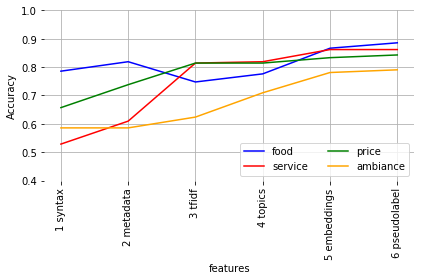

In [127]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="food", markers=True, data=df,
             color="blue", label="food")
sns.lineplot(x="features", y="service", markers=True, data=df,
             color="red", label="service")
sns.lineplot(x="features", y="price", markers=True, data=df,
             color="green", label="price")
sns.lineplot(x="features", y="ambiance", markers=True, data=df,
             color="orange", label="ambiance")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../../3_reports/figures/model_accuracy_20190620.png")

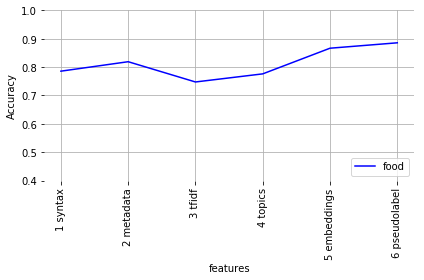

In [128]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="food", markers=True, data=df,
             color="blue", label="food")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../../3_reports/figures/food_model_accuracy_20190620.png")

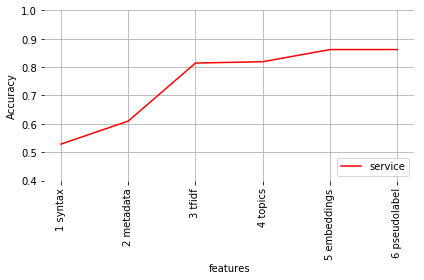

In [129]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="service", markers=True, data=df,
             color="red", label="service")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../../3_reports/figures/service_model_accuracy_20190620.png")

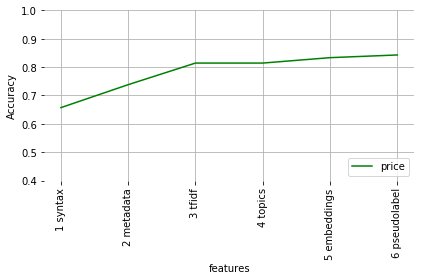

In [130]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="price", markers=True, data=df,
             color="green", label="price")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../../3_reports/figures/price_model_accuracy_20190620.png")

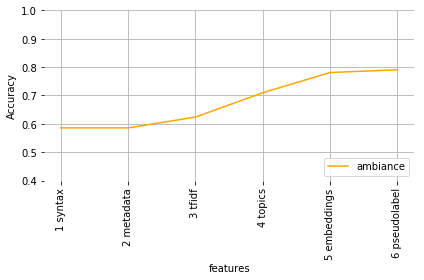

In [132]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="ambiance", markers=True, data=df,
             color="orange", label="ambiance")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../../3_reports/figures/ambiance_model_accuracy_20190620.png")

#### Features

In [112]:
ambiance_p_df = pd.DataFrame(sorted(list(zip(feature_names, ambiance_p.feature_importances_)), key=lambda x: -x[1]))
ambiance_p_df.columns = ["feature", "importance"]

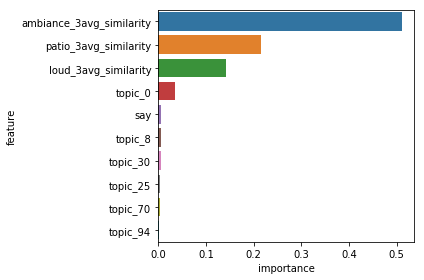

In [133]:
f, ax = plt.subplots()
ax = sns.barplot(y="feature", x="importance", data=ambiance_p_df.iloc[:10,:])
plt.tight_layout()
plt.savefig("../../3_reports/figures/ambiance_fi_20190620.png")

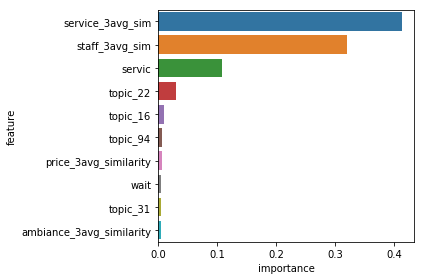

In [134]:
service_p_df = pd.DataFrame(sorted(list(zip(feature_names, service_p.feature_importances_)), key=lambda x: -x[1]))
service_p_df.columns = ["feature", "importance"]
f, ax = plt.subplots()
ax = sns.barplot(y="feature", x="importance", data=service_p_df.iloc[:10,:])
plt.tight_layout()
plt.savefig("../../3_reports/figures/service_fi_20190620.png")

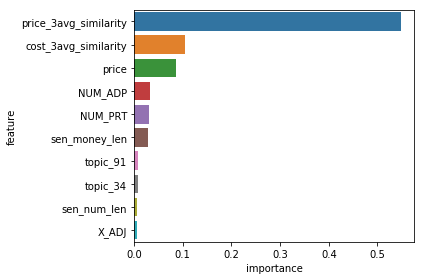

In [135]:
price_p_df = pd.DataFrame(sorted(list(zip(feature_names, price_p.feature_importances_)), key=lambda x: -x[1]))
price_p_df.columns = ["feature", "importance"]
f, ax = plt.subplots()
ax = sns.barplot(y="feature", x="importance", data=price_p_df.iloc[:10,:])
plt.tight_layout()
plt.savefig("../../3_reports/figures/price_fi_20190620.png")

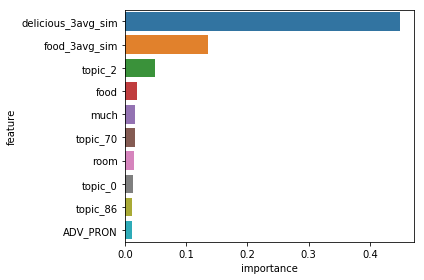

In [136]:
food_p_df = pd.DataFrame(sorted(list(zip(feature_names, food_p.feature_importances_)), key=lambda x: -x[1]))
food_p_df.columns = ["feature", "importance"]
f, ax = plt.subplots()
ax = sns.barplot(y="feature", x="importance", data=food_p_df.iloc[:10,:])
plt.tight_layout()
plt.savefig("../../3_reports/figures/food_fi_20190620.png")